In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from random import randint


In [ ]:
!pip install pyg-nightly
!pip install scipy==1.8.1
!pip install -q grpcio

In [ ]:
""" from google.colab import drive
drive.mount('/content/drive')
facebook = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/facebook_combined.txt",sep=" ",names=["start_node", "end_node"])
facebook """

In [10]:
import networkx as nx
from networkx.generators.community import LFR_benchmark_graph

n = 20  # number of nodes
tau1 = 3  # exponent for the degree distribution of the first community
tau2 = 1.5  # exponent for the degree distribution of the second community
mu = 0.1  # fraction of intra-community edges
average_degree = 5  # average degree of nodes
max_iters = 500  # maximum number of iterations for generating the graph
min_community = 30  # minimum size of communities

G = LFR_benchmark_graph(n=n, tau1=tau1, tau2=tau2, mu=mu, average_degree=average_degree, max_iters=max_iters, min_community=min_community)


The graph is created from the facebook dataframe of the edges:

In [ ]:
G = nx.from_pandas_edgelist(facebook, "start_node", "end_node")

n = len(G)
m = len(G.edges())
n, m


Visualizing the graph

Since we don’t have any real sense of structure in the data, let’s start by viewing the graph with random_layout, which is among the fastest of the layout functions.

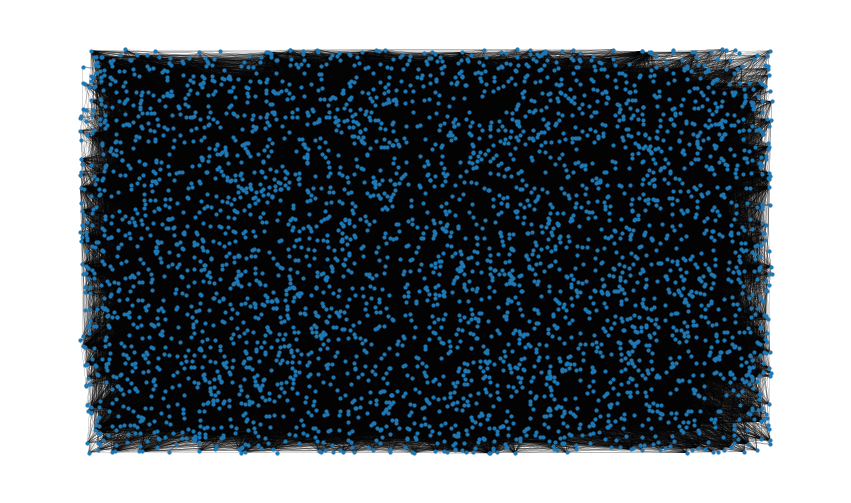

In [ ]:
fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
plot_options = {"node_size": 10, "with_labels": False, "width": 0.15}
nx.draw_networkx(G, pos=nx.random_layout(G), ax=ax, **plot_options)

It’s clear that we need to impose more structure on the positioning of the if we want to get a sense for the data. For this, we can use the spring_layout function which is the default layout function for the networkx drawing module. The spring_layout function has the advantage that it takes into account the nodes and edges to compute locations of the nodes. The downside however, is that this process is much more computationally expensive, and can be quite slow for graphs with 100’s of nodes and 1000’s of edges.

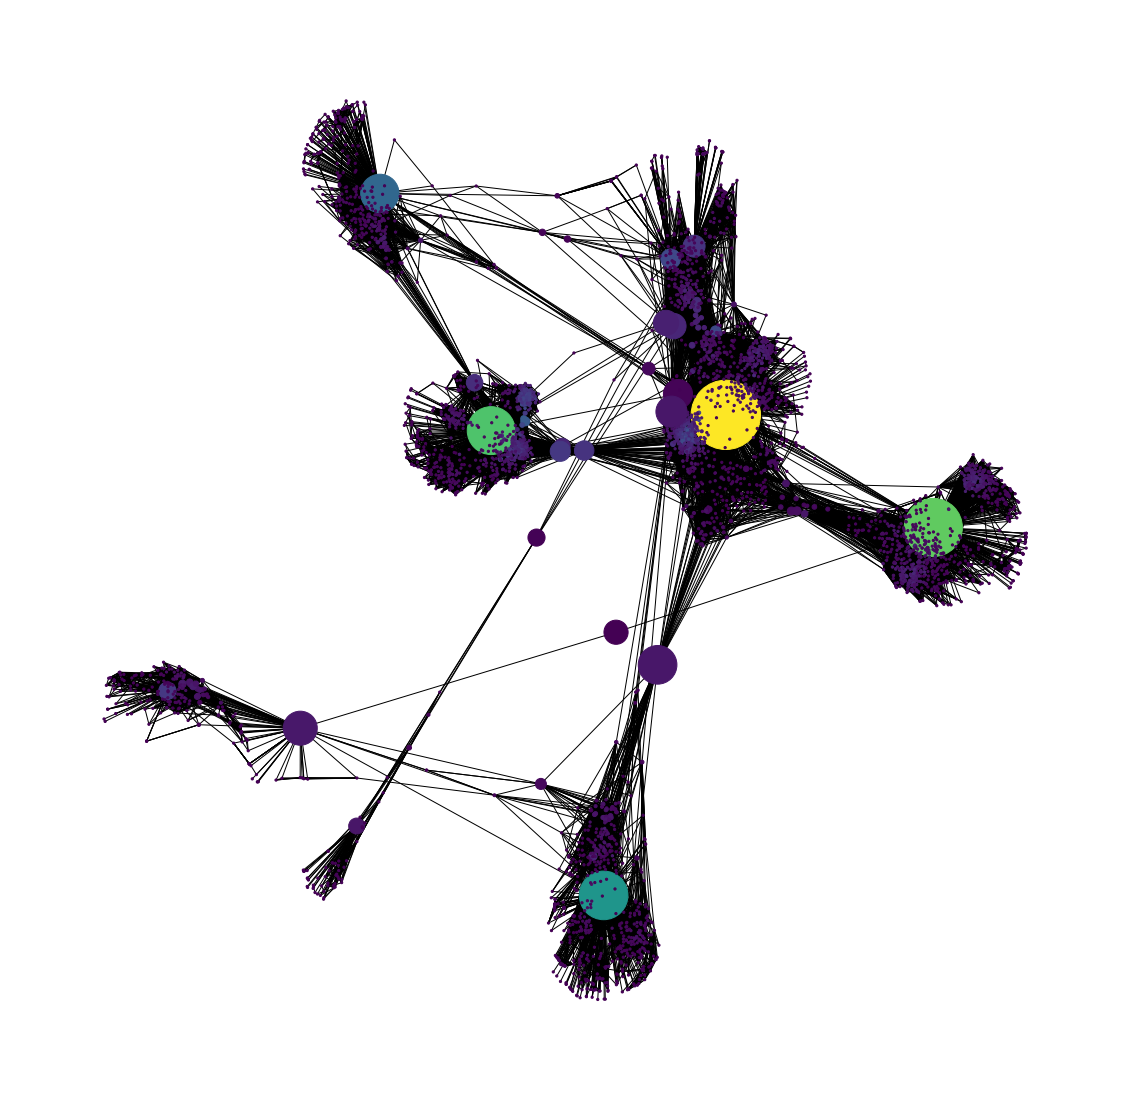

In [ ]:
pos = nx.spring_layout(G)
betCent = nx.betweenness_centrality(G, normalized=True, endpoints=True)
node_color = [20000.0 * G.degree(v) for v in G]
node_size =  [v * 10000 for v in betCent.values()]
plt.figure(figsize=(20,20))
nx.draw_networkx(G, pos=pos, with_labels=False,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off');

In [ ]:
#Total number of nodes in network
G.number_of_nodes()


4039

In [ ]:
#Total number of edges
G.number_of_edges()

88234

Also, the average degree of a node can be seen.

On average, a node is connected to almost 44 other nodes, also known as neighbors of the node.

This has been calculated by creating a list of all the degrees of the nodes and using numpy.array to find the mean of the created list.

In [ ]:
np.mean([d for _, d in G.degree()])

43.69101262688784

We find the nodes with the highest degree centralities. Specifically, the nodes with the 8 highest degree centralities are shown below together with the degree centrality. That means that node 107
 has the highest degree centrality with 
, meaning that this facebook user is friends with around the 26% of the whole network.

In [ ]:
degree_centrality = nx.centrality.degree_centrality(G)
(sorted(degree_centrality.items(), key=lambda item: item[1], reverse=True))[:8]

[(107, 0.258791480931154),
 (1684, 0.1961367013372957),
 (1912, 0.18697374938088163),
 (3437, 0.13546310054482416),
 (0, 0.08593363051015354),
 (2543, 0.07280832095096582),
 (2347, 0.07206537890044576),
 (1888, 0.0629024269440317)]

(-0.9991880235075951,
 1.1078363832831382,
 -1.164599134027958,
 0.7322099342942238)

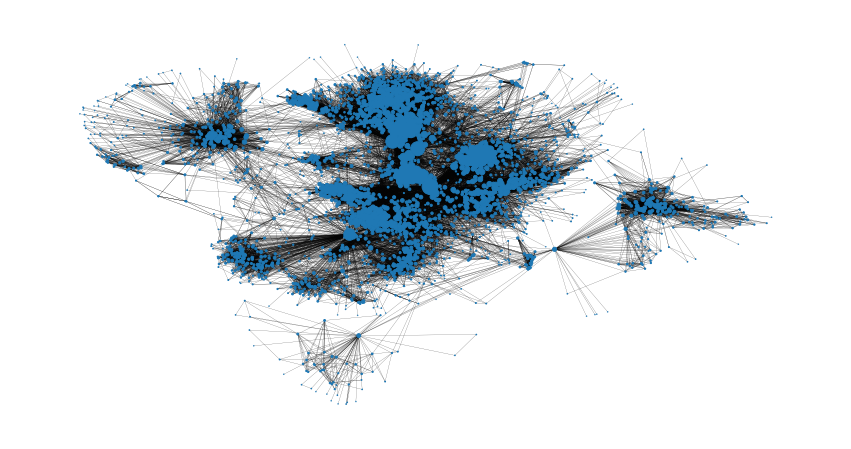

In [ ]:
node_size = [
    v * 1000 for v in degree_centrality.values()
]  # set up nodes size for a nice graph representation
plt.figure(figsize=(15, 8))
nx.draw_networkx(G, pos=pos, node_size=node_size, with_labels=False, width=0.15)
plt.axis("off")

Betweenness centrality measures the number of times a node lies on the shortest path between other nodes, meaning it acts as a bridge. In detail, betweenness centrality of a node 
 is the percentage of all the shortest paths of any two nodes (apart from 
), which pass through.

In [ ]:
betweenness_centrality = nx.centrality.betweenness_centrality(
    G
)  # save results in a variable to use again
(sorted(betweenness_centrality.items(), key=lambda item: item[1], reverse=True))[:8]

[(107, 0.4805180785560152),
 (1684, 0.3377974497301992),
 (3437, 0.23611535735892905),
 (1912, 0.2292953395868782),
 (1085, 0.14901509211665306),
 (0, 0.14630592147442917),
 (698, 0.11533045020560802),
 (567, 0.09631033121856215)]

In [ ]:
facebook.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88234 entries, 0 to 88233
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   start_node  88234 non-null  int64
 1   end_node    88234 non-null  int64
dtypes: int64(2)
memory usage: 1.3 MB


In [ ]:
node_size = [
    v * 1200 for v in betweenness_centrality.values()
]  # set up nodes size for a nice graph representation
plt.figure(figsize=(15, 8))
nx.draw_networkx(G, pos=pos, node_size=node_size, with_labels=False, width=0.15)
plt.axis("off")